# 6 基于树的方法

## 6.1 分类树

In [1]:
library(tree)

Warning message:
"package 'tree' was built under R version 3.3.3"

In [2]:
# 用ifelse()函数创建High变量，Sales大于8取Yes，否则取No
library(ISLR)
attach(Carseats)
High=ifelse(Sales<=8,"No","Yes")

Warning message:
"package 'ISLR' was built under R version 3.3.3"

In [3]:
# 用data.frame()将High与Carseats数据集合并
Carseats=data.frame(Carseats,High)

In [4]:
# 用tree()建立分类树，用除Sales之外的所有变量预测High
tree.carseats=tree(High~.-Sales,Carseats)

In [5]:
# 函数summary()列出用于生成终端结点的所有变量、终端结点个数和（训练）错误率
summary(tree.carseats)


Classification tree:
tree(formula = High ~ . - Sales, data = Carseats)
Variables actually used in tree construction:
[1] "ShelveLoc"   "Price"       "Income"      "CompPrice"   "Population" 
[6] "Advertising" "Age"         "US"         
Number of terminal nodes:  27 
Residual mean deviance:  0.4575 = 170.7 / 373 
Misclassification error rate: 0.09 = 36 / 400 

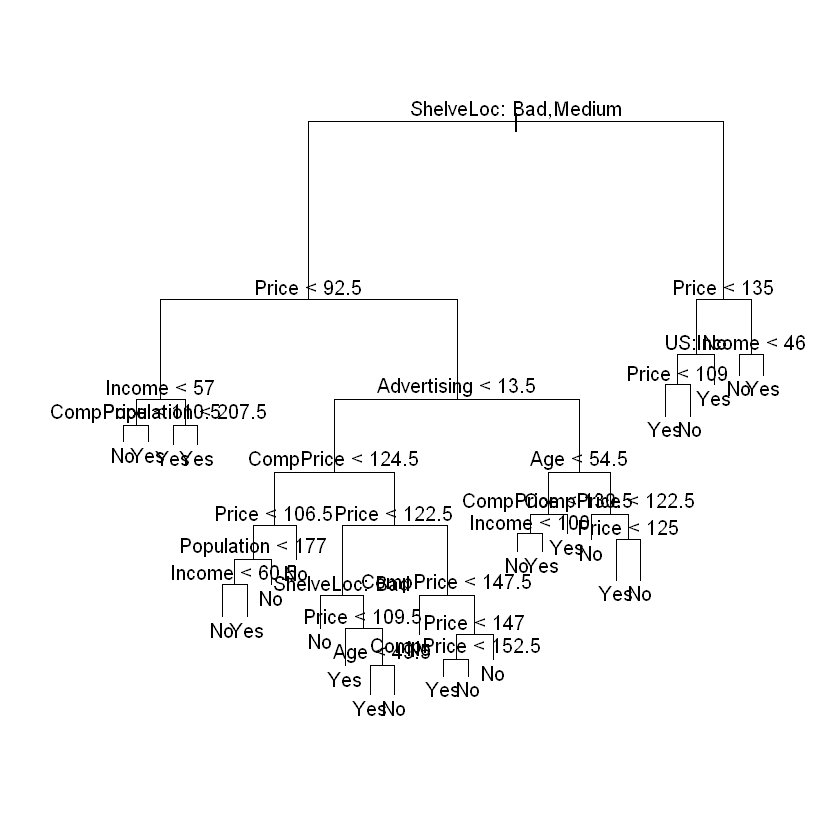

In [6]:
# plot()显示树的结构，用函数text()显示结点标记，参数pretty=0使R输出所有定性预测变量的类别名，而不仅仅是展示各类名的首字母
plot(tree.carseats)
text(tree.carseats,pretty=0)

In [7]:
# 输出决策树每个分支的结果，包括分裂规则、分支上观测值的数量、偏差、分支的整体预测（YES或NO）和这一分支中取YES和NO的观测值的比例，星号表示终端结点
tree.carseats

node), split, n, deviance, yval, (yprob)
      * denotes terminal node

  1) root 400 541.500 No ( 0.59000 0.41000 )  
    2) ShelveLoc: Bad,Medium 315 390.600 No ( 0.68889 0.31111 )  
      4) Price < 92.5 46  56.530 Yes ( 0.30435 0.69565 )  
        8) Income < 57 10  12.220 No ( 0.70000 0.30000 )  
         16) CompPrice < 110.5 5   0.000 No ( 1.00000 0.00000 ) *
         17) CompPrice > 110.5 5   6.730 Yes ( 0.40000 0.60000 ) *
        9) Income > 57 36  35.470 Yes ( 0.19444 0.80556 )  
         18) Population < 207.5 16  21.170 Yes ( 0.37500 0.62500 ) *
         19) Population > 207.5 20   7.941 Yes ( 0.05000 0.95000 ) *
      5) Price > 92.5 269 299.800 No ( 0.75465 0.24535 )  
       10) Advertising < 13.5 224 213.200 No ( 0.81696 0.18304 )  
         20) CompPrice < 124.5 96  44.890 No ( 0.93750 0.06250 )  
           40) Price < 106.5 38  33.150 No ( 0.84211 0.15789 )  
             80) Population < 177 12  16.300 No ( 0.58333 0.41667 )  
              160) Income < 60.5 6   0

In [8]:
# 切分训练集、测试集
set.seed(2)
train=sample(1:nrow(Carseats), 200)
Carseats.test=Carseats[-train,]
High.test=High[-train]

In [9]:
# 参数type="class"使R返回真实的预测类别
tree.carseats=tree(High~.-Sales,Carseats,subset=train)
tree.pred=predict(tree.carseats,Carseats.test,type="class")

In [10]:
# 混淆矩阵，对测试集上约71.5%的数据作出正确预测
table(tree.pred,High.test)
(86+57)/200

         High.test
tree.pred No Yes
      No  86  27
      Yes 30  57

[1] 0.715

In [11]:
# cv.tree()函数，通过交叉验证对树进行剪枝，确定最优的树复杂性
# 选择对象属性FUN=prune.misclass，用分类错误率而不是cv.tree()默认的偏差作为评判标准
# 函数cv.tree()给出了所考虑的每棵树的终端结点个数（size）、相应的分类错误率，使用的成本复杂性参数值k
set.seed(3)
cv.carseats=cv.tree(tree.carseats,FUN=prune.misclass)
names(cv.carseats)

[1] "size"   "dev"    "k"      "method"

In [12]:
# 当终端结点数为9时，交叉验证错误率最低，共有50个交叉验证误差
cv.carseats

$size
[1] 19 17 14 13  9  7  3  2  1

$dev
[1] 55 55 53 52 50 56 69 65 80

$k
[1]       -Inf  0.0000000  0.6666667  1.0000000  1.7500000  2.0000000  4.2500000
[8]  5.0000000 23.0000000

$method
[1] "misclass"

attr(,"class")
[1] "prune"         "tree.sequence"

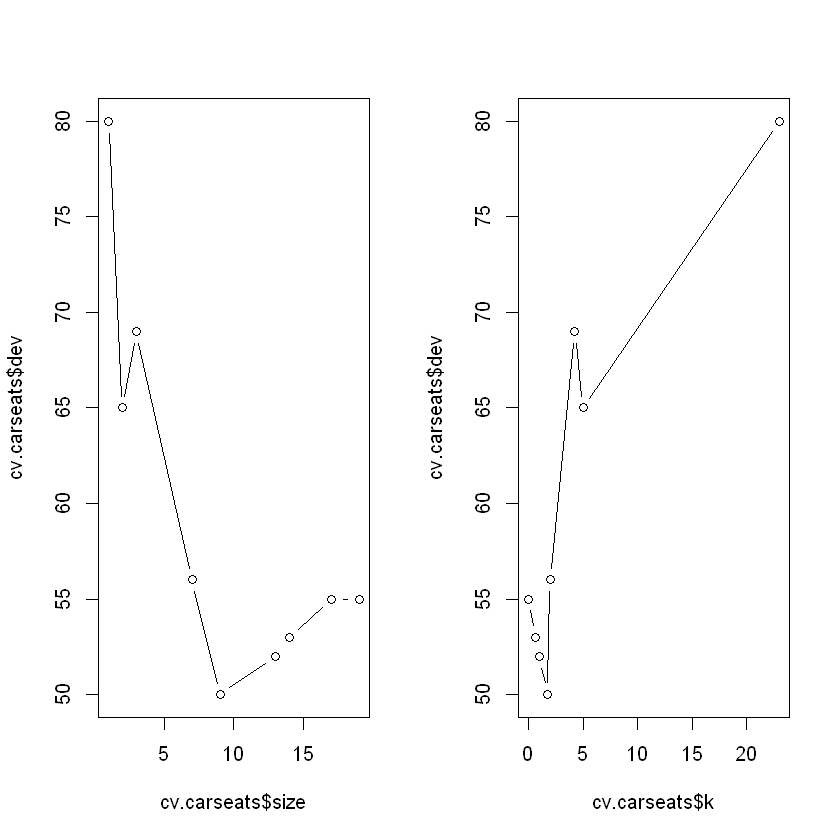

In [13]:
# 画出错误率对size和k的函数
par(mfrow=c(1,2))
plot(cv.carseats$size,cv.carseats$dev,type="b")
plot(cv.carseats$k,cv.carseats$dev,type="b")

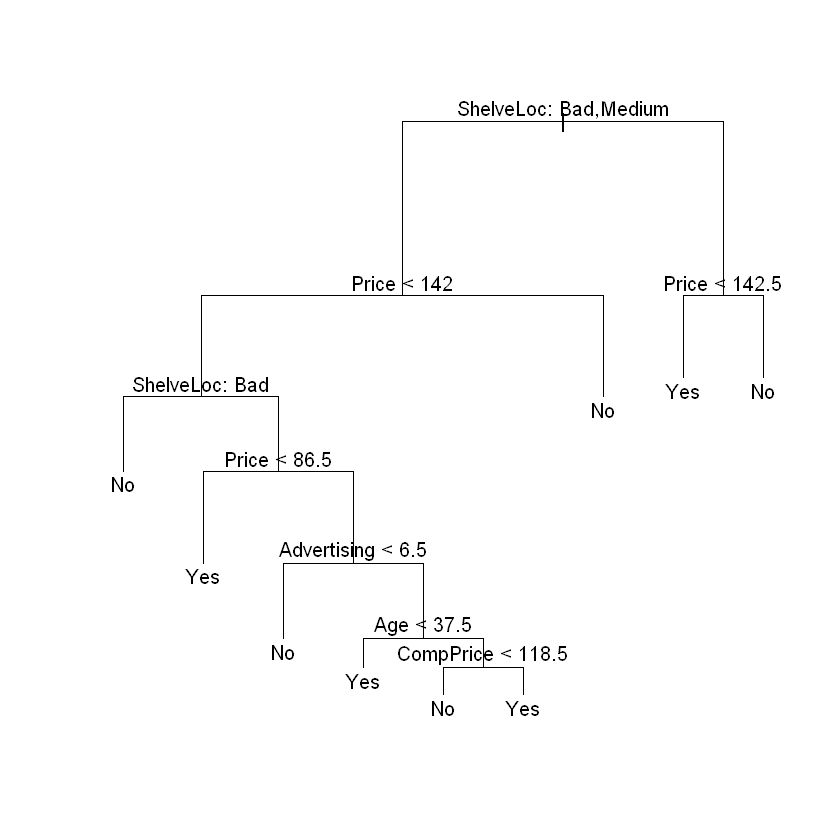

In [14]:
# 用函数prune.misclass()剪枝，以得到有9个结点的树
prune.carseats=prune.misclass(tree.carseats,best=9)
plot(prune.carseats)
text(prune.carseats,pretty=0)

In [15]:
# 使用predict()函数测试剪枝后的树在测试集上的效果
# 剪枝不仅生成了一棵更易于解释的树，而且提高了分类准确性
tree.pred=predict(prune.carseats,Carseats.test,type="class")
table(tree.pred,High.test)
(94+60)/200

         High.test
tree.pred No Yes
      No  94  24
      Yes 22  60

[1] 0.77

## 6.2 回归树

In [16]:
library(MASS)

In [17]:
# 用Boston数据集建立回归树，创建训练集并根据训练数据生成树
set.seed(1)
train = sample(1:nrow(Boston), nrow(Boston)/2)
tree.boston=tree(medv~.,Boston,subset=train)
summary(tree.boston)


Regression tree:
tree(formula = medv ~ ., data = Boston, subset = train)
Variables actually used in tree construction:
[1] "lstat" "rm"    "dis"  
Number of terminal nodes:  8 
Residual mean deviance:  12.65 = 3099 / 245 
Distribution of residuals:
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-14.10000  -2.04200  -0.05357   0.00000   1.96000  12.60000 

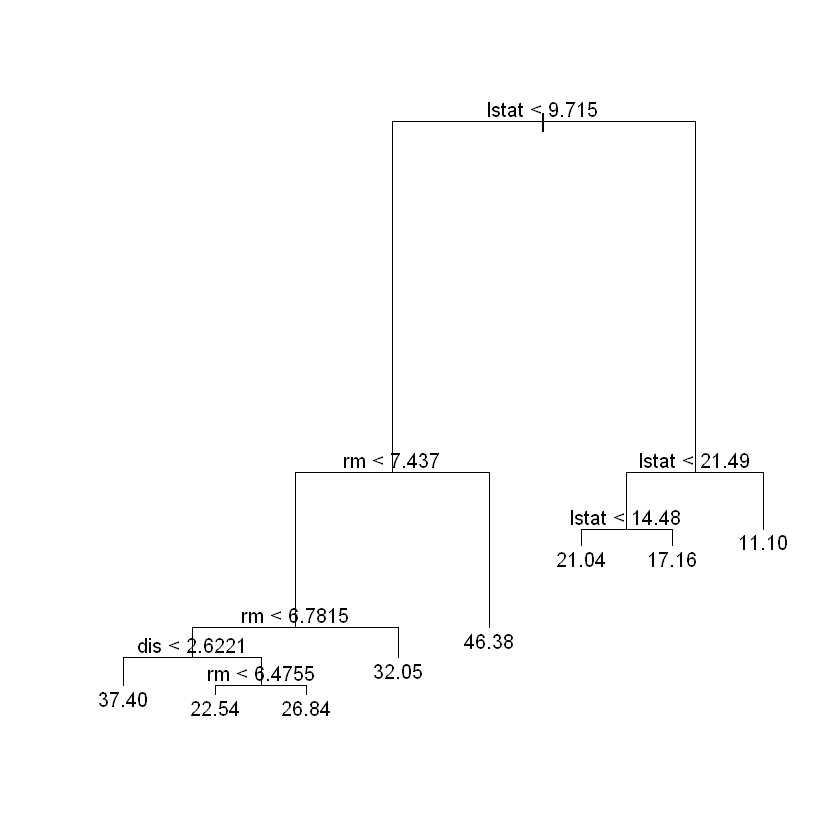

In [18]:
plot(tree.boston)
text(tree.boston,pretty=0)

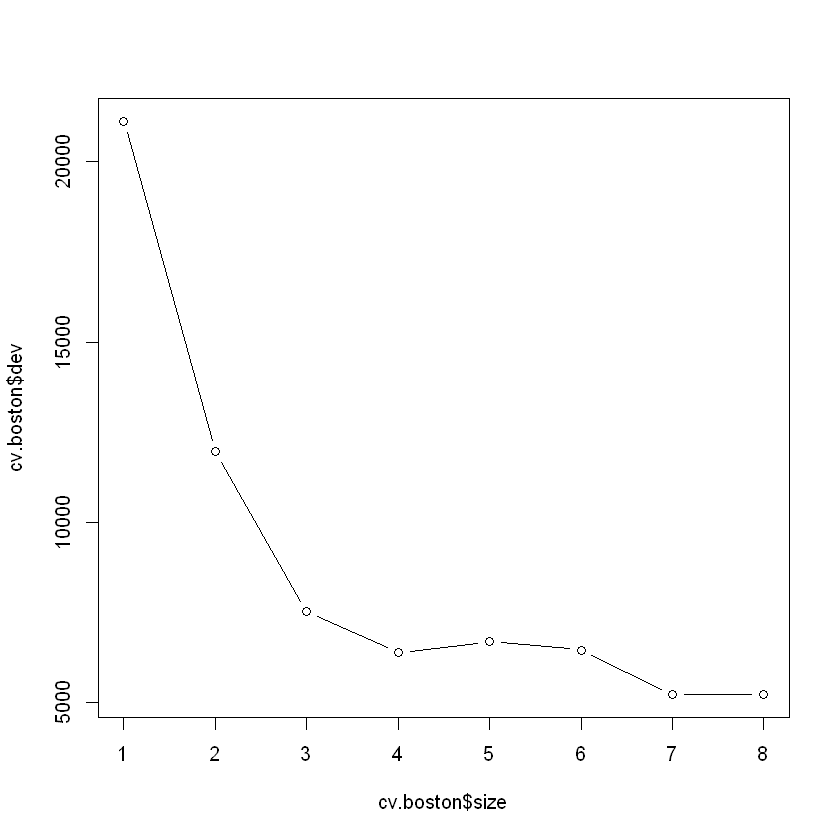

In [19]:
# 用cv.tree()观察剪枝是否提升了树的预测效果
cv.boston=cv.tree(tree.boston)
plot(cv.boston$size,cv.boston$dev,type='b')

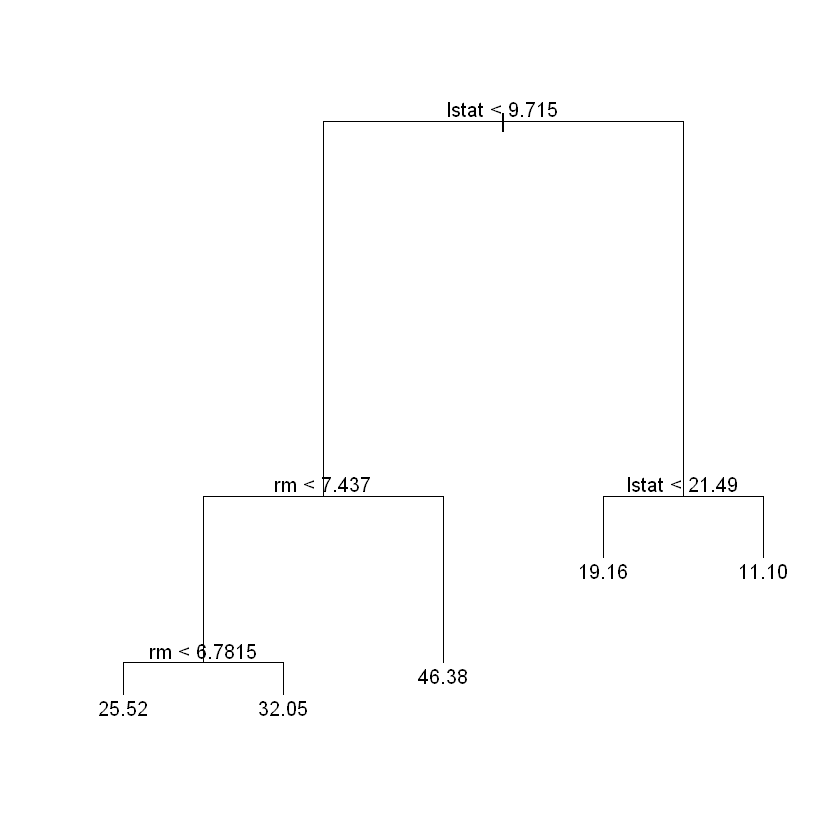

In [20]:
# 使用prune.tree()函数对树剪枝
prune.boston=prune.tree(tree.boston,best=5)
plot(prune.boston)
text(prune.boston,pretty=0)

In [21]:
# 交叉验证选出了未剪枝的树，在测试集上进行预测
yhat=predict(tree.boston,newdata=Boston[-train,])

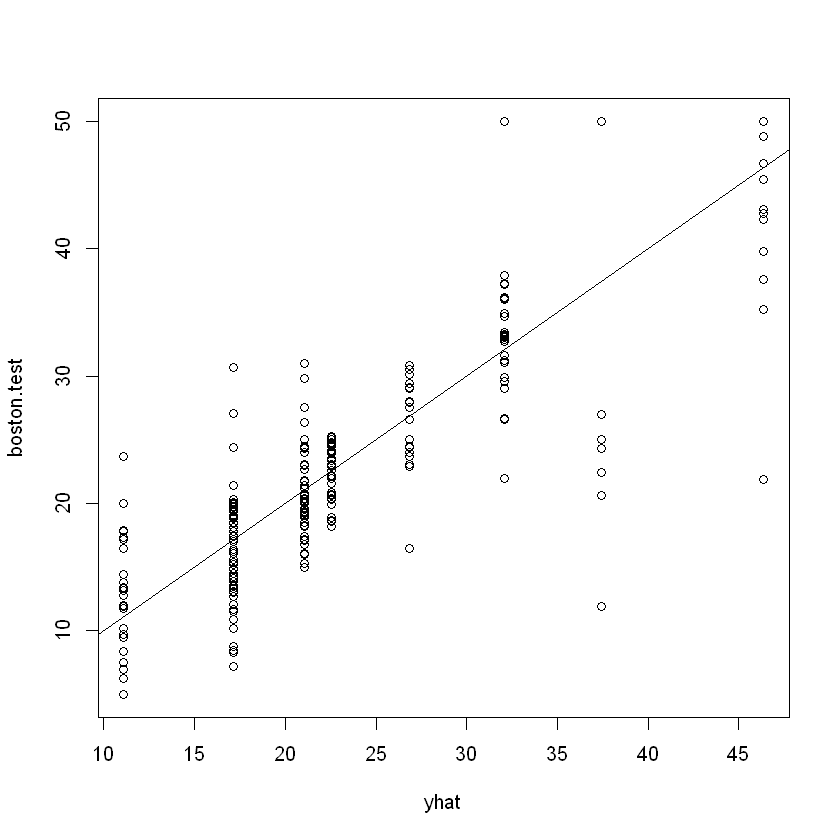

In [22]:
boston.test=Boston[-train,"medv"]
plot(yhat,boston.test)
abline(0,1)

In [23]:
# 回归树的MSE为25.05，均方误差的平方根是5.005，意味着这个模型的测试预测值与郊区真实房价的中位数之差在5005美元之内
mean((yhat-boston.test)^2)

[1] 25.04559

## 6.3 袋装法和随机森林

In [24]:
library(randomForest)

randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.


In [25]:
# 袋装法是随机森林在m=p时的一种特殊情况，用randomForest()执行袋装法（mtry=13）
set.seed(1)
bag.boston=randomForest(medv~.,data=Boston,subset=train,mtry=13,importance=TRUE)
bag.boston


Call:
 randomForest(formula = medv ~ ., data = Boston, mtry = 13, importance = TRUE,      subset = train) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 13

          Mean of squared residuals: 11.02509
                    % Var explained: 86.65

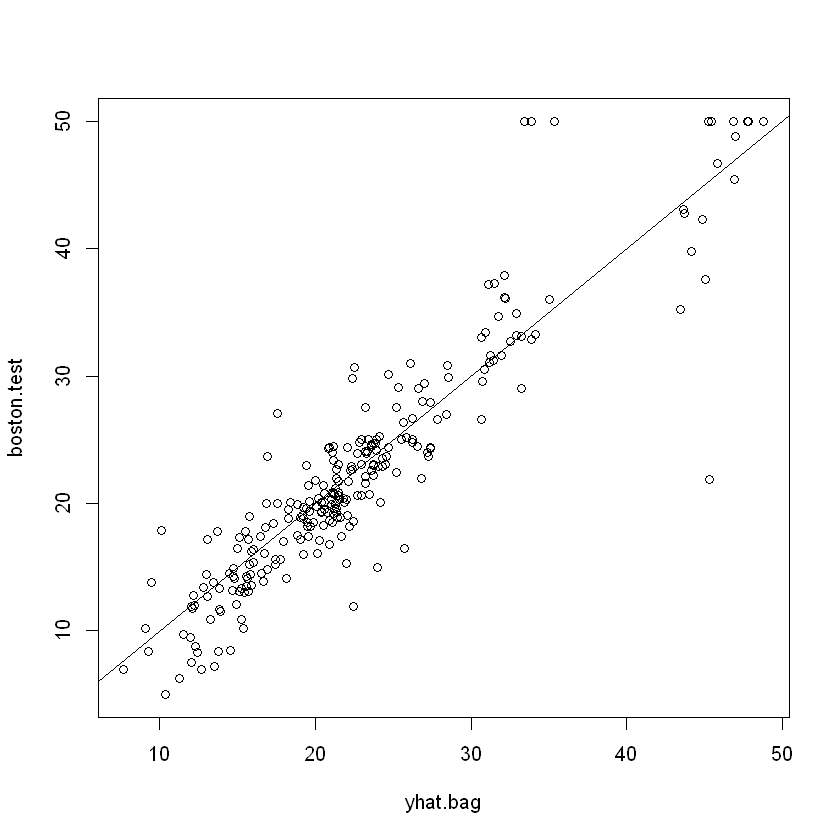

In [26]:
# 观察袋装法在测试集上的效果
yhat.bag = predict(bag.boston,newdata=Boston[-train,])
plot(yhat.bag, boston.test)
abline(0,1)

In [27]:
mean((yhat.bag-boston.test)^2)

[1] 13.47349

In [28]:
# 用参数ntree改变由randomForest()生成的树的数目
bag.boston=randomForest(medv~.,data=Boston,subset=train,mtry=13,ntree=25)
yhat.bag = predict(bag.boston,newdata=Boston[-train,])
mean((yhat.bag-boston.test)^2)

[1] 13.43068

In [29]:
# randomForest()默认在用回归树建立随机森林时取p/3个变量，用分类树时取sqrt(p)个变量
# 这里取mtry=6
set.seed(1)
rf.boston=randomForest(medv~.,data=Boston,subset=train,mtry=6,importance=TRUE)
yhat.rf = predict(rf.boston,newdata=Boston[-train,])
mean((yhat.rf-boston.test)^2)

[1] 11.48022

In [30]:
# importance()浏览各变量的重要性
# 给出变量重要性的两个度量
# 前者为给定变量被排除在模型之外时，预测袋外样本的准确性的平均减小值
# 后者衡量给定变量导致的分裂使结点不纯度减小的总量
# 分类树的结点纯度由偏差衡量，回归树的结点纯度由RSS衡量
importance(rf.boston)

,%IncMSE,IncNodePurity
crim,12.547772,1094.65382
zn,1.375489,64.40060
indus,9.304258,1086.09103
chas,2.518766,76.36804
nox,12.835614,1008.73703
rm,31.646147,6705.02638
age,9.970243,575.13702
dis,12.774430,1351.01978
rad,3.911852,93.78200
tax,7.624043,453.19472


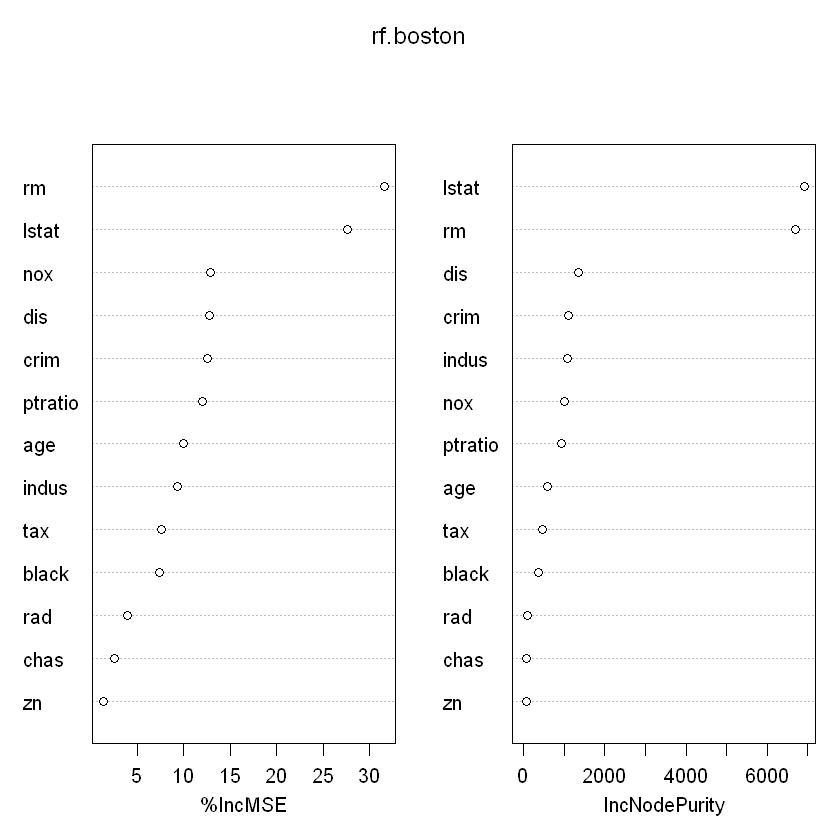

In [31]:
# varImpPlot()函数可以画出变量重要程度
varImpPlot(rf.boston)

## 6.4 提升法

Warning message:
"package 'gbm' was built under R version 3.3.3"Loading required package: survival
Loading required package: lattice
Loading required package: splines
Loading required package: parallel
Loaded gbm 2.1.3


,var,rel.inf
lstat,lstat,45.9627334
rm,rm,31.2238187
dis,dis,6.8087398
crim,crim,4.0743784
nox,nox,2.5605001
ptratio,ptratio,2.2748652
black,black,1.7971159
age,age,1.6488532
tax,tax,1.3595005
indus,indus,1.2705924


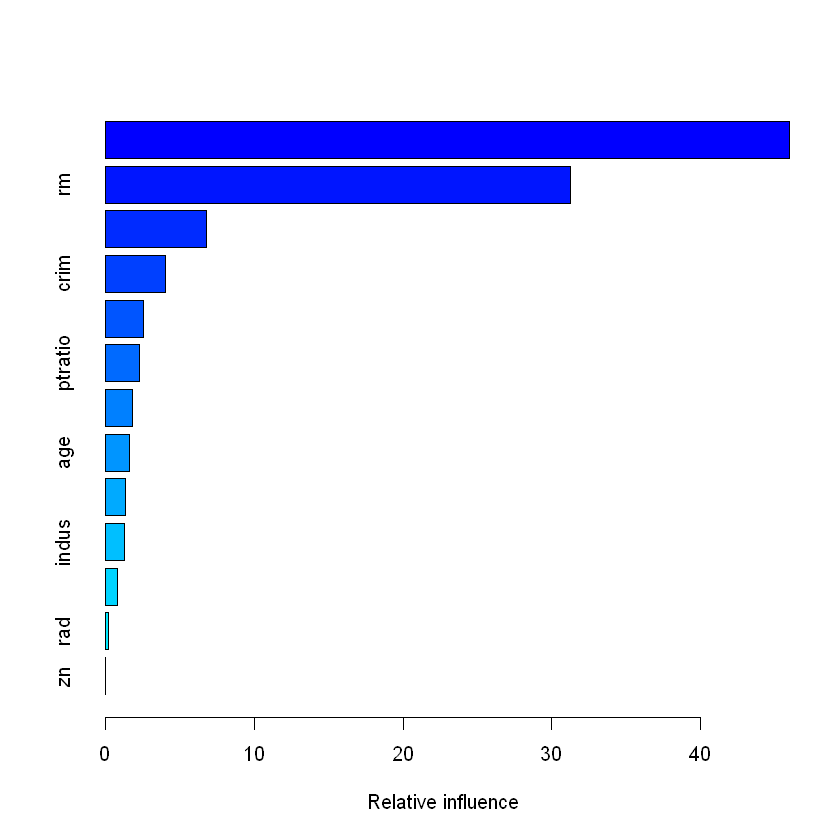

In [32]:
# gbm包中的gbm()函数建立提升树
# 回归问题，执行gbm()时选择distribution="gaussian"，二分类问题，选择distribution="bernoulli"
# n.trees=5000表示提升树模型共需要5000棵树，选择interaction.depth=4限制了每棵树的深度
library(gbm)
set.seed(1)
boost.boston=gbm(medv~.,data=Boston[train,],distribution="gaussian",n.trees=5000,interaction.depth=4)
summary(boost.boston)

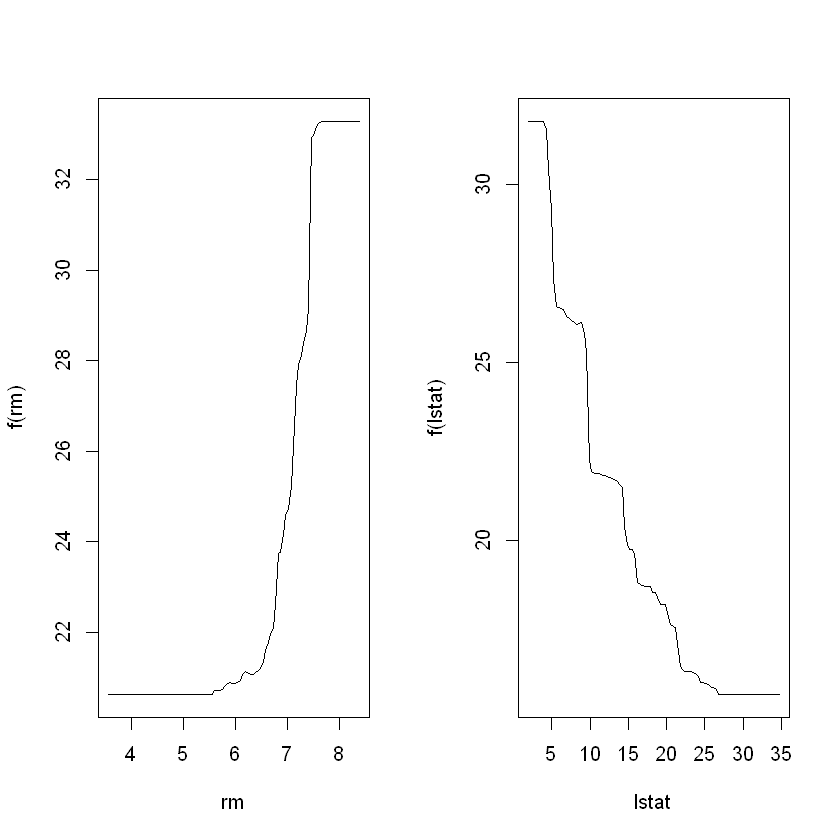

In [33]:
# 上图可见lstat和rm是最重要的变量
# 画出这两个变量的偏相关图，反映排除其他变量后，所选变量对响应值的边际影响
# 住宅价格中位数随rm的增大而增大，随lstat的增大而减小
par(mfrow=c(1,2))
plot(boost.boston,i="rm")
plot(boost.boston,i="lstat")

In [34]:
# 在测试集上预测medv
yhat.boost=predict(boost.boston,newdata=Boston[-train,],n.trees=5000)
mean((yhat.boost-boston.test)^2)

[1] 11.84434

In [35]:
# 设置压缩参数lambda来建立提升树，这里去lambda=0.2
boost.boston=gbm(medv~.,data=Boston[train,],distribution="gaussian",n.trees=5000,interaction.depth=4,shrinkage=0.2,verbose=F)
yhat.boost=predict(boost.boston,newdata=Boston[-train,],n.trees=5000)
mean((yhat.boost-boston.test)^2)

[1] 11.51109